In [1]:
from bigdl.util.common import *
from image import *
import cv2
import numpy as np
from IPython.display import Image, display
JavaCreator.set_creator_class("com.intel.analytics.zoo.transform.vision.pythonapi.PythonVisionTransform")
init_engine()

In [2]:
test_image = '/home/jxy/data/testdata/test/000019.jpg'

def create_image_feature(path):
    image = cv2.imread(path)
    return ImageFeature(image)
    
def transform_display(transformer, image_feature):
    out = transformer.transform(image_feature)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False))
    display(Image(filename='/tmp/tmp.jpg'))

creating: createImageFeature
creating: createColorJitter


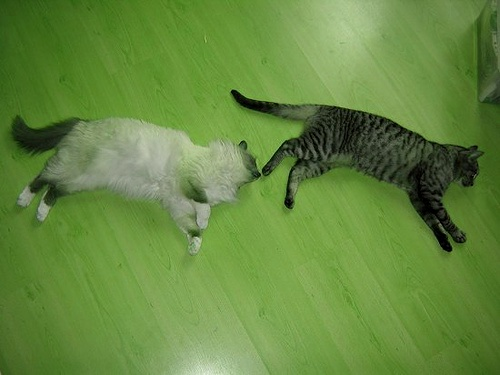

In [3]:
image_feature = create_image_feature(test_image)
color = ColorJitter(random_order_prob=1.0, shuffle=True)
transform_display(color, image_feature)

creating: createImageFeature
creating: createResize


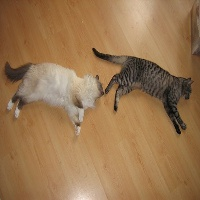

In [4]:
image_feature = create_image_feature(test_image)
resize = Resize(200, 200, 1)
transform_display(resize, image_feature)

creating: createImageFeature
creating: createFixedCrop


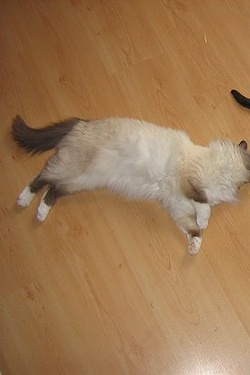

creating: createImageFeature
creating: createFixedCrop


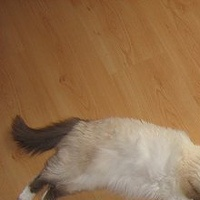

In [11]:
# Normalized Roi
image_feature = create_image_feature(test_image)
crop = FixedCrop(0.0, 0.0, 0.5, 1.0)
transform_display(crop, image_feature)

# Non-normalized Roi
image_feature = create_image_feature(test_image)
crop = FixedCrop(0.0, 0.0, 200.0, 200., False)
transform_display(crop, image_feature)

creating: createImageFeature
creating: createCenterCrop


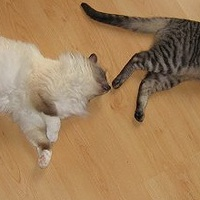

In [25]:
image_feature = create_image_feature(test_image)
crop = CenterCrop(200, 200)
transform_display(crop, image_feature)

creating: createImageFeature
creating: createRandomCrop


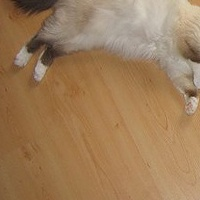

In [24]:
image_feature = create_image_feature(test_image)
crop = RandomCrop(200, 200)
transform_display(crop, image_feature)

creating: createImageFeature
creating: createExpand


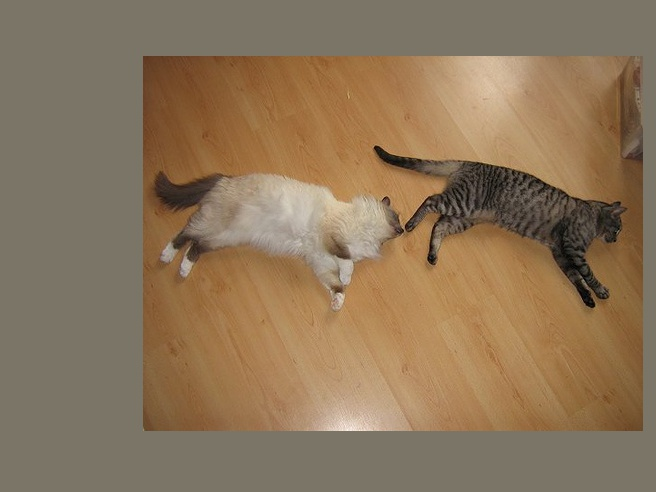

In [22]:
image_feature = create_image_feature(test_image)
expand = Expand(means_r=123, means_g=117, means_b=104,
                 max_expand_ratio=2.0)
transform_display(expand, image_feature)

creating: createImageFeature
creating: createHFlip


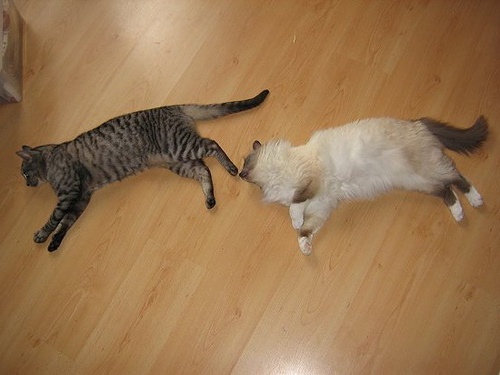

In [15]:
image_feature = create_image_feature(test_image)
transformer = HFlip()
transform_display(transformer, image_feature)

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createImageFeature


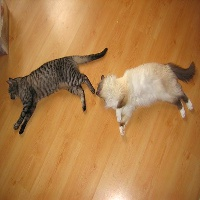

In [16]:
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1)])
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

creating: createHFlip
creating: createRandomTransformer
creating: createImageFeature


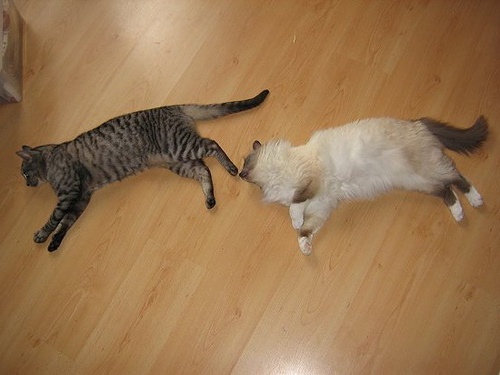

In [17]:
transformer = RandomTransformer(HFlip(), 0.5)
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

In [18]:
image_feature = create_image_feature(test_image)
print image_feature
print image_feature.to_sample()
print image_feature.get_image()
print image_feature.get_label()

creating: createImageFeature
com.intel.analytics.zoo.transform.vision.image.ImageFeature@762b9c2d
Sample: features: [JTensor: storage: [  33.   32.   34. ...,  107.  107.  108.], shape: [  3 375 500], float], label: JTensor: storage: [-1.], shape: [1], float,
[[[  33.   32.   34. ...,   79.   79.   80.]
  [  33.   32.   34. ...,   78.   79.   82.]
  [  34.   33.   34. ...,   78.   78.   81.]
  ..., 
  [  82.   47.   43. ...,   42.   42.   42.]
  [ 102.   58.   46. ...,   43.   43.   43.]
  [ 112.   66.   48. ...,   41.   41.   42.]]

 [[  56.   55.   57. ...,  102.   99.  100.]
  [  56.   55.   57. ...,  100.   99.  102.]
  [  57.   56.   57. ...,  100.   98.  101.]
  ..., 
  [ 115.   79.   74. ...,   75.   75.   75.]
  [ 133.   91.   77. ...,   76.   76.   76.]
  [ 144.   97.   79. ...,   74.   74.   75.]]

 [[  94.   93.   95. ...,  118.  117.  118.]
  [  94.   93.   95. ...,  118.  117.  120.]
  [  95.   94.   95. ...,  118.  116.  119.]
  ..., 
  [ 131.   98.   97. ...,  108.  108.

In [19]:
folder = "/home/jxy/data/testdata/test"
imageFiles = os.listdir(folder)
images = []
labels = []
for f in imageFiles:
    image = cv2.imread(folder + '/' + f)
    images.append(image)
    labels.append(np.array([2]))
    
img_rdd = sc.parallelize(images)
labels_rdd = sc.parallelize(labels)
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats(200, 200)])

# create ImageFrame from image ndarray rdd
image_frame = ImageFrame(img_rdd, labels_rdd)

# apply transformer to image_frame
image_frame = transformer(image_frame)
print type(image_frame)

# image_frame to sample
sample_rdd = image_frame.to_sample()
print sample_rdd.take(1)

# get label rdd
label_rdd = image_frame.get_label()
print 'label ', label_rdd.take(1)

# get image rdd
image_rdd = image_frame.get_image()
print image_rdd.take(1)

color = ColorJitter()
hflip = HFlip()
resize = Resize(200, 200, 1)
to_float = MatToFloats(200, 200)

image_frame = ImageFrame(img_rdd)
image_frame = color(image_frame)
image_frame = hflip(image_frame)
image_frame = resize(image_frame)
image_frame = to_float(image_frame)
print type(image_frame)
sample = image_frame.to_sample() 
print sample.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createImageFrame
<class 'image.ImageFrame'>
[Sample: features: [JTensor: storage: [ 80.36603546  77.44416046  43.02228928 ...,  -1.58708596  -1.58708596
  -1.58708596], shape: [  3 200 200], float], label: JTensor: storage: [ 2.], shape: [1], float]
label  [array([ 2.], dtype=float32)]
[array([[[ 103.49789429,  100.57601929,   66.15414429, ...,   72.91976929,
           70.79476929,   68.10726929],
        [ 104.15414429,  104.85726929,   70.29476929, ...,   74.74789429,
           71.18539429,   66.13851929],
        [ 104.38851929,  108.13851929,   72.63851929, ...,   78.29476929,
           80.85726929,   68.45101929],
        ..., 
        [  97.26351929,   95.96664429,  103.68539429, ...,   21.5447731 ,
           21.5447731 ,   21.5447731 ],
        [  83.43539429,  101.16976929,   99.34164429, ...,   21.5447731 ,
           21.5447731 ,   21.5447731 ],
        [  87.357

In [20]:
folder = "/home/jxy/data/testdata/test"
imageFiles = os.listdir(folder)
images = []
for f in imageFiles:
    image = cv2.imread(folder + '/' + f)
    images.append(image)
    
img_rdd = sc.parallelize(images)

color = ColorJitter()
hflip = HFlip()
resize = Resize(200, 200, 1)
to_float = MatToFloats(200, 200)

image_frame = ImageFrame(img_rdd)
image_frame = color(image_frame)
image_frame = hflip(image_frame)
image_frame = resize(image_frame)
image_frame = to_float(image_frame)
print type(image_frame)
sample = image_frame.to_sample() 
print sample.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createImageFrame
<class 'image.ImageFrame'>
6
